## HR Analytics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/train_LZdllcl.csv')

### Data Analysis

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
df.shape

(54808, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
df['is_promoted'].value_counts() # Classisfication problem with unbalanced dataset

,count
is_promoted,
0,50140
1,4668


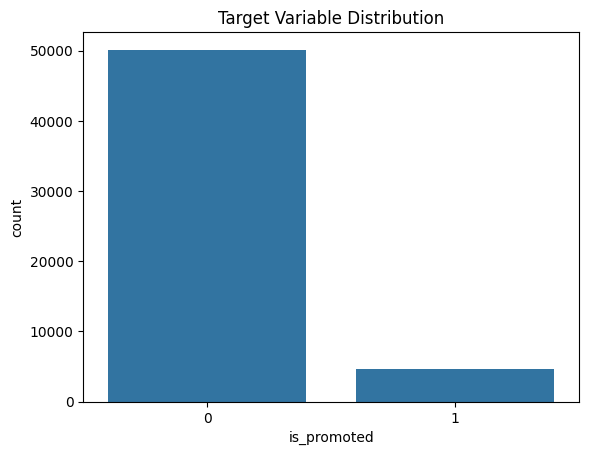

In [10]:
plt.figure()
sns.countplot(x='is_promoted', data=df)
plt.title("Target Variable Distribution")
plt.show()

In [11]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [12]:
df['previous_year_rating'].value_counts()

,count
previous_year_rating,
3.0,18618
5.0,11741
4.0,9877
1.0,6223
2.0,4225


In [13]:
df['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


### Preprocessing

In [14]:
test = pd.read_csv('/content/test_2umaH9m.csv')

In [15]:
test.shape

(23490, 13)

In [16]:
X_train = df.drop('is_promoted',axis = 1)
y_train = df['is_promoted']

X_test = test.copy()

In [17]:
X_test.isna().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [18]:
rating_median = X_train['previous_year_rating'].median()
X_train['previous_year_rating'] = X_train['previous_year_rating'].fillna(rating_median)
X_test['previous_year_rating'] = X_test['previous_year_rating'].fillna(rating_median)

In [19]:
education_mode = X_train['education'].mode()[0]
X_train['education'] = X_train['education'].fillna(education_mode)
X_test['education'] = X_test['education'].fillna(education_mode)

In [20]:
X_train.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [21]:
numerical_cols = ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score' ]
categoricai_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),numerical_cols),
    ('cat',OneHotEncoder(), categoricai_cols)
])

In [23]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.fit_transform(X_test)

In [24]:
X_train_preprocessed.shape

(54808, 59)

### Model Selection

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_preprocessed, y_train)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
y_pred_rf = rf.predict(X_test_preprocessed)
y_prob_rf = rf.predict_proba(X_test_preprocessed)[:,1]

In [45]:
sample_sub = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [46]:
sample_sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [47]:
sample_sub.shape

(23490, 2)

In [48]:
y_pred_rf.shape

(23490,)

In [49]:
sample_sub['is_promoted'] = y_pred_rf

In [50]:
sample_sub.to_csv("final_Submission.csv", index=False)